# CNN, First model

### Imports and fetch data

In [2]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv1D, GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import TensorBoard, EarlyStopping
import pickle
import numpy as np
import matplotlib.pyplot as plt


Using TensorFlow backend.
/Users/lisasjoblom/anaconda3/envs/dml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
# import data
with open('X_train_even.pickle', 'rb') as handle:
    X_train = pickle.load(handle)
    
with open('Y_train_even.pickle', 'rb') as handle:
    Y_train = pickle.load(handle)
    
with open('scores_train_even.pickle', 'rb') as handle:
    scores_train = pickle.load(handle)
    
with open('X_test_even.pickle', 'rb') as handle:
    X_test = pickle.load(handle)
    
with open('Y_test_even.pickle', 'rb') as handle:
    Y_test = pickle.load(handle)
    
with open('scores_test_even.pickle', 'rb') as handle:
    scores_test = pickle.load(handle)
    
# import dictionaries
with open('ix_to_word.pickle', 'rb') as handle:
    ix_to_word = pickle.load(handle)
    
# small change in format
tmp = np.concatenate(X_train).ravel()
X_train = np.reshape(tmp,(len(X_train),100))

tmp = np.concatenate(X_test).ravel()
X_test = np.reshape(tmp,(len(X_test),100))

review_length = X_test.shape[1]
num_words = 46210

print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))
print('The length of each review is {}.'.format(review_length))


Loaded dataset with 199483 training samples, 49871 test samples
The length of each review is 100.


In [3]:
num_datapoints = 10000

small_Y = Y_train[0:num_datapoints]
small_X = X_train[0:num_datapoints]

### Define models to try

In [4]:
def one_conv_model(review_length, num_words):
    model = Sequential()
    emb = Embedding(num_words, 200, input_length=review_length)
    model.add(emb)
    model.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [5]:
def two_conv_model(review_length, num_words):
    model = Sequential()
    emb = Embedding(num_words, 200, input_length=review_length)
    model.add(emb)
    model.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [6]:
def two_conv_regularized_model(review_length, num_words):
    model = Sequential()
    emb = Embedding(num_words, 200, input_length=review_length)
    model.add(emb)
    model.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [7]:
def two_conv_regularized_larger_kernel_model(review_length, num_words):
    model = Sequential()
    emb = Embedding(num_words, 200, input_length=review_length)
    model.add(emb)
    model.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=100, kernel_size=4, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [8]:
def three_conv_regularized_model(review_length, num_words):
    model = Sequential()
    emb = Embedding(num_words, 200, input_length=review_length)
    model.add(emb)
    model.add(Conv1D(filters=50, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=30, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=20, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [9]:
def three_conv_more_filter_model(review_length, num_words):
    model = Sequential()
    emb = Embedding(num_words, 200, input_length=review_length)
    model.add(emb)
    model.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [10]:
def three_conv_larger_kernel_model(review_length, num_words):
    model = Sequential()
    emb = Embedding(num_words, 200, input_length=review_length)
    model.add(emb)
    model.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=100, kernel_size=3, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=100, kernel_size=5, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [11]:
def vanilla_nn(review_length, num_words):
    model = Sequential()
    emb = Embedding(num_words, 200, input_length=review_length)
    model.add(emb)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

### Train models

In [30]:
model = one_conv_model(review_length, num_words)
tb = TensorBoard(log_dir='./logs/one_conv_model')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])
#model.fit(small_X, small_Y, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])

Train on 159586 samples, validate on 39897 samples
Epoch 1/10
159586/159586 [==============================] - 16s 102us/step - loss: 0.3336 - acc: 0.8545 - val_loss: 0.2648 - val_acc: 0.8923
Epoch 2/10
159586/159586 [==============================] - 16s 99us/step - loss: 0.1908 - acc: 0.9278 - val_loss: 0.2627 - val_acc: 0.8970
Epoch 3/10
 19456/159586 [==>...........................] - ETA: 13s - loss: 0.0948 - acc: 0.9679

KeyboardInterrupt: 

In [31]:
model.save('one_conv_model.h5')

In [28]:
model = two_conv_model(review_length, num_words)
tb = TensorBoard(log_dir='./logs/two_conv_model')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])
#model.fit(small_X, small_Y, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])

Train on 159586 samples, validate on 39897 samples
Epoch 1/10
159586/159586 [==============================] - 20s 125us/step - loss: 0.3355 - acc: 0.8510 - val_loss: 0.2604 - val_acc: 0.8952
Epoch 2/10
159586/159586 [==============================] - 19s 122us/step - loss: 0.1941 - acc: 0.9262 - val_loss: 0.2466 - val_acc: 0.9046
Epoch 3/10
159586/159586 [==============================] - 19s 122us/step - loss: 0.1109 - acc: 0.9608 - val_loss: 0.2889 - val_acc: 0.9001
Epoch 4/10
 35584/159586 [=====>........................] - ETA: 14s - loss: 0.0481 - acc: 0.9858

KeyboardInterrupt: 

In [29]:
model.save('two_conv_model.h5')

In [16]:
model = two_conv_regularized_model(review_length, num_words)
tb = TensorBoard(log_dir='./logs/two_conv_regularized_model')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])
#model.fit(small_X, small_Y, validation_split=0.2, epochs=10, batch_size=256, verbose=1)

Train on 159586 samples, validate on 39897 samples
Epoch 1/10
159586/159586 [==============================] - 24s 150us/step - loss: 0.3301 - acc: 0.8572 - val_loss: 0.2646 - val_acc: 0.8923
Epoch 2/10
159586/159586 [==============================] - 23s 145us/step - loss: 0.1928 - acc: 0.9253 - val_loss: 0.2766 - val_acc: 0.8931
Epoch 3/10
159586/159586 [==============================] - 23s 145us/step - loss: 0.1160 - acc: 0.9573 - val_loss: 0.2986 - val_acc: 0.8963
Epoch 4/10
159586/159586 [==============================] - 23s 145us/step - loss: 0.0727 - acc: 0.9737 - val_loss: 0.3534 - val_acc: 0.8931
Epoch 5/10
159586/159586 [==============================] - 23s 145us/step - loss: 0.0531 - acc: 0.9811 - val_loss: 0.3977 - val_acc: 0.8948
Epoch 6/10
159586/159586 [==============================] - 23s 145us/step - loss: 0.0408 - acc: 0.9852 - val_loss: 0.4566 - val_acc: 0.8923
Epoch 7/10
159586/159586 [==============================] - 23s 145us/step - loss: 0.0361 - acc: 0.9871

In [17]:
model.save('two_conv_regularized_model.h5')

In [18]:
model = two_conv_regularized_larger_kernel_model(review_length, num_words)
tb = TensorBoard(log_dir='./logs/two_conv_regularized_larger_kernel_model')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])
#model.fit(small_X, small_Y, validation_split=0.2, epochs=10, batch_size=256, verbose=1)

Train on 159586 samples, validate on 39897 samples
Epoch 1/10
159586/159586 [==============================] - 26s 164us/step - loss: 0.3352 - acc: 0.8547 - val_loss: 0.2580 - val_acc: 0.8946
Epoch 2/10
159586/159586 [==============================] - 25s 154us/step - loss: 0.1795 - acc: 0.9315 - val_loss: 0.2779 - val_acc: 0.8946
Epoch 3/10
159586/159586 [==============================] - 25s 154us/step - loss: 0.1026 - acc: 0.9632 - val_loss: 0.3073 - val_acc: 0.8976
Epoch 4/10
159586/159586 [==============================] - 25s 154us/step - loss: 0.0657 - acc: 0.9765 - val_loss: 0.3531 - val_acc: 0.8937
Epoch 5/10
159586/159586 [==============================] - 25s 154us/step - loss: 0.0474 - acc: 0.9833 - val_loss: 0.4093 - val_acc: 0.8912
Epoch 6/10
159586/159586 [==============================] - 25s 154us/step - loss: 0.0382 - acc: 0.9870 - val_loss: 0.4438 - val_acc: 0.8933
Epoch 7/10
159586/159586 [==============================] - 25s 154us/step - loss: 0.0331 - acc: 0.9881

In [19]:
model.save('two_conv_regularized_larger_kernel_model.h5')

In [20]:
model = three_conv_regularized_model(review_length, num_words)
tb = TensorBoard(log_dir='./logs/three_conv_regularized_model')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])
#model.fit(small_X, small_Y, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])

Train on 159586 samples, validate on 39897 samples
Epoch 1/10
159586/159586 [==============================] - 20s 128us/step - loss: 0.3580 - acc: 0.8400 - val_loss: 0.3134 - val_acc: 0.8712
Epoch 2/10
159586/159586 [==============================] - 18s 112us/step - loss: 0.2268 - acc: 0.9102 - val_loss: 0.2810 - val_acc: 0.8877
Epoch 3/10
159586/159586 [==============================] - 18s 112us/step - loss: 0.1562 - acc: 0.9408 - val_loss: 0.2874 - val_acc: 0.8926
Epoch 4/10
159586/159586 [==============================] - 18s 112us/step - loss: 0.1082 - acc: 0.9603 - val_loss: 0.3284 - val_acc: 0.8877
Epoch 5/10
159586/159586 [==============================] - 18s 113us/step - loss: 0.0764 - acc: 0.9725 - val_loss: 0.3547 - val_acc: 0.8910
Epoch 6/10
159586/159586 [==============================] - 18s 113us/step - loss: 0.0577 - acc: 0.9792 - val_loss: 0.4014 - val_acc: 0.8887
Epoch 7/10
159586/159586 [==============================] - 18s 112us/step - loss: 0.0440 - acc: 0.9843

In [21]:
model.save('three_conv_regularized_model.h5')

In [22]:
model = three_conv_more_filter_model(review_length, num_words)
tb = TensorBoard(log_dir='./logs/three_conv_more_filter_model')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])
#model.fit(small_X, small_Y, validation_split=0.2, epochs=10, batch_size=256, verbose=1)

Train on 159586 samples, validate on 39897 samples
Epoch 1/10
159586/159586 [==============================] - 31s 191us/step - loss: 0.3437 - acc: 0.8488 - val_loss: 0.2888 - val_acc: 0.8819
Epoch 2/10
159586/159586 [==============================] - 29s 180us/step - loss: 0.2068 - acc: 0.9193 - val_loss: 0.2946 - val_acc: 0.8828
Epoch 3/10
159586/159586 [==============================] - 29s 180us/step - loss: 0.1354 - acc: 0.9497 - val_loss: 0.2924 - val_acc: 0.8954
Epoch 4/10
159586/159586 [==============================] - 29s 180us/step - loss: 0.0942 - acc: 0.9650 - val_loss: 0.3692 - val_acc: 0.8846
Epoch 5/10
159586/159586 [==============================] - 29s 180us/step - loss: 0.0648 - acc: 0.9762 - val_loss: 0.3815 - val_acc: 0.8911
Epoch 6/10
159586/159586 [==============================] - 29s 180us/step - loss: 0.0501 - acc: 0.9824 - val_loss: 0.4029 - val_acc: 0.8960
Epoch 7/10
159586/159586 [==============================] - 29s 180us/step - loss: 0.0418 - acc: 0.9850

In [23]:
model.save('three_conv_more_filter_model.h5')

In [32]:
model = three_conv_larger_kernel_model(review_length, num_words)
tb = TensorBoard(log_dir='./logs/three_conv_larger_kernel_model')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])
#model.fit(small_X, small_Y, validation_split=0.2, epochs=10, batch_size=256, verbose=1)

Train on 159586 samples, validate on 39897 samples
Epoch 1/10
159586/159586 [==============================] - 33s 206us/step - loss: 0.3469 - acc: 0.8486 - val_loss: 0.2651 - val_acc: 0.8918
Epoch 2/10
159586/159586 [==============================] - 32s 199us/step - loss: 0.2004 - acc: 0.9233 - val_loss: 0.2572 - val_acc: 0.9007
Epoch 3/10
  9472/159586 [>.............................] - ETA: 28s - loss: 0.1057 - acc: 0.9639

KeyboardInterrupt: 

In [33]:
model.save('three_conv_larger_kernel_model.h5')

In [26]:
model = vanilla_nn(review_length, num_words)
tb = TensorBoard(log_dir='./logs/vanilla_nn_model')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])
#model.fit(small_X, small_Y, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])

Train on 159586 samples, validate on 39897 samples
Epoch 1/10
159586/159586 [==============================] - 17s 106us/step - loss: 0.3506 - acc: 0.8432 - val_loss: 0.2846 - val_acc: 0.8824
Epoch 2/10
159586/159586 [==============================] - 16s 103us/step - loss: 0.1253 - acc: 0.9538 - val_loss: 0.3607 - val_acc: 0.8746
Epoch 3/10
159586/159586 [==============================] - 16s 103us/step - loss: 0.0297 - acc: 0.9904 - val_loss: 0.5388 - val_acc: 0.8730
Epoch 4/10
159586/159586 [==============================] - 16s 103us/step - loss: 0.0097 - acc: 0.9970 - val_loss: 0.7066 - val_acc: 0.8738
Epoch 5/10
159586/159586 [==============================] - 16s 103us/step - loss: 0.0109 - acc: 0.9961 - val_loss: 0.8276 - val_acc: 0.8681
Epoch 6/10
159586/159586 [==============================] - 16s 103us/step - loss: 0.0184 - acc: 0.9940 - val_loss: 0.7670 - val_acc: 0.8720
Epoch 7/10
159586/159586 [==============================] - 17s 104us/step - loss: 0.0093 - acc: 0.9966

In [27]:
model.save('vanilla_nn.h5')

### Predict

In [ ]:
model.save('two_conv_regularized_larger_kernel_model.h5')

In [4]:
model = load_model('two_conv_model.h5')

In [5]:
print(model.summary())
preds = np.round(model.predict(X_test)).T
preds = preds[0]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 200)          9242000   
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 99, 100)           40100     
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 98, 100)           20100     
_________________________________________________________________
global_max_pooling1d_8 (Glob (None, 100)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               25856     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 257       
Total params: 9,328,313
Trainable params: 9,328,313
Non-trainable params: 0
_________________________________________________________________


### Investigate misclassifications

In [6]:
misclassifications = np.where(preds!=Y_test)
misclassifications = misclassifications[0]
print('Out of {} test reviews, {} were misclassified.'.format(len(Y_test), len(misclassifications)))
print('A few examples of the misclassified reviews:')

def print_sentence(index):
    sentence_ix = misclassifications[index]
    tmp = []
    for val in X_test[sentence_ix]:
        if ix_to_word[str(val)] == 'ZERO':
            break
        tmp.append(ix_to_word[str(val)])
    processed_sentence = ' '.join(tmp)
    print(processed_sentence)
    
def print_misclassification(index):
    print('1. Predicted output: {} Actual label: {} Score: {}'.format(preds[misclassifications[index]], Y_test[misclassifications[index]], scores_test[misclassifications[index]]))
    print_sentence(index)
    print(' ')
  
print_misclassification(0)
print_misclassification(10)
print_misclassification(20)
print_misclassification(30)
print_misclassification(40)
print_misclassification(50)
print_misclassification(60)

Out of 49871 test reviews, 4909 were misclassified.
A few examples of the misclassified reviews:
1. Predicted output: 0.0 Actual label: 1 Score: 4
i am ordering the coconut raw nectar again becasue of the health benifits and i like it in my coffee the last package was packaged very well but the last bottle has begun to crystalize which means its not as fresh i have purchased this product before in bulk in my community and never had a problem with it crystalizing i hope this next shipment will be fresh
 
1. Predicted output: 0.0 Actual label: 1 Score: 4
i would hope it would go without saying but if you don't like plain almonds you probably won't like them sprinkled with cocoa powder i like almonds particularly for their health benefits that are fairly well known i usually avoid them covered in salt and flavoring powder but i'm glad i gave these a try the packaging suggests dark chocolate and it would be easy to get the wrong idea that these will taste chocolate in the sense of milk cho

/Users/lisasjoblom/anaconda3/envs/dml/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


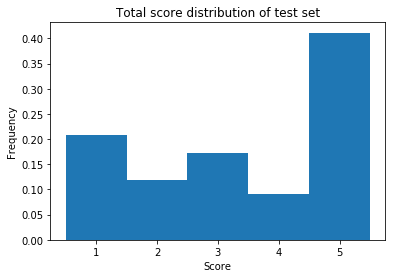

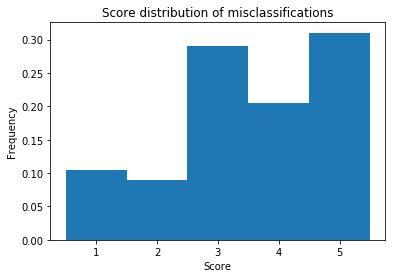

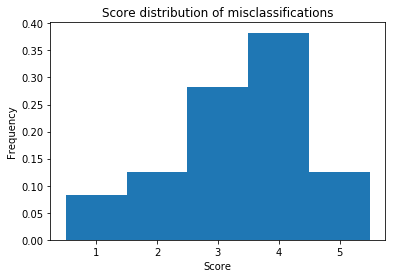

In [7]:
###### SCORE DISTRIBUTION ######
plt.hist(scores_test, bins=[1,2,3,4,5,6], normed=True)
plt.title('Total score distribution of test set')
plt.ylabel('Frequency')
plt.xlabel('Score')
plt.xticks([1.5,2.5,3.5,4.5,5.5],[1,2,3,4,5])
plt.show()
#print('Total number of data points: %d' %len(Y_even))

plt.hist(scores_test[misclassifications], bins=[1,2,3,4,5,6], normed=True)
plt.title('Score distribution of misclassifications')
plt.ylabel('Frequency')
plt.xlabel('Score')
#plt.Axes.set_xticks(ticks=[1.5,2.5,3.5,4.5,5.5])
plt.xticks([1.5,2.5,3.5,4.5,5.5],[1,2,3,4,5])
plt.show()
#print('Number of training data points: %d' %len(Y_train_even))

num_scores = [sum(scores_test == 1), sum(scores_test == 2), sum(scores_test == 3), sum(scores_test == 4), sum(scores_test == 5)]
num_scores_misclassifications = [sum(scores_test[misclassifications] == 1), sum(scores_test[misclassifications] == 2), sum(scores_test[misclassifications] == 3), sum(scores_test[misclassifications] == 4), sum(scores_test[misclassifications] == 5)]

scaled_scores_mis = [num_scores_misclassifications[i]/num_scores[i] for i in range(5)]
scaled_scores_mis = np.round([x*1000 for x in scaled_scores_mis])
scaled_scores_mis_data = [1] * int(scaled_scores_mis[0]) + [2] * int(scaled_scores_mis[1]) + [3] * int(scaled_scores_mis[2]) + [4] * int(scaled_scores_mis[3]) + [5] * int(scaled_scores_mis[4])

plt.hist(scaled_scores_mis_data, bins=[1,2,3,4,5,6], normed=True)
plt.title('Score distribution of misclassifications')
plt.ylabel('Frequency')
plt.xlabel('Score')
#plt.Axes.set_xticks(ticks=[1.5,2.5,3.5,4.5,5.5])
plt.xticks([1.5,2.5,3.5,4.5,5.5],[1,2,3,4,5])
plt.show()
#print('Number of training data points: %d' %len(Y_train_even))